In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [23]:
df=pd.read_csv(r"E:\CreditCardDefaultPrediction\notebooks\data\creditCardFraud_28011964_120214.csv")

In [24]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [25]:
df.shape

(1001, 24)

In [26]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

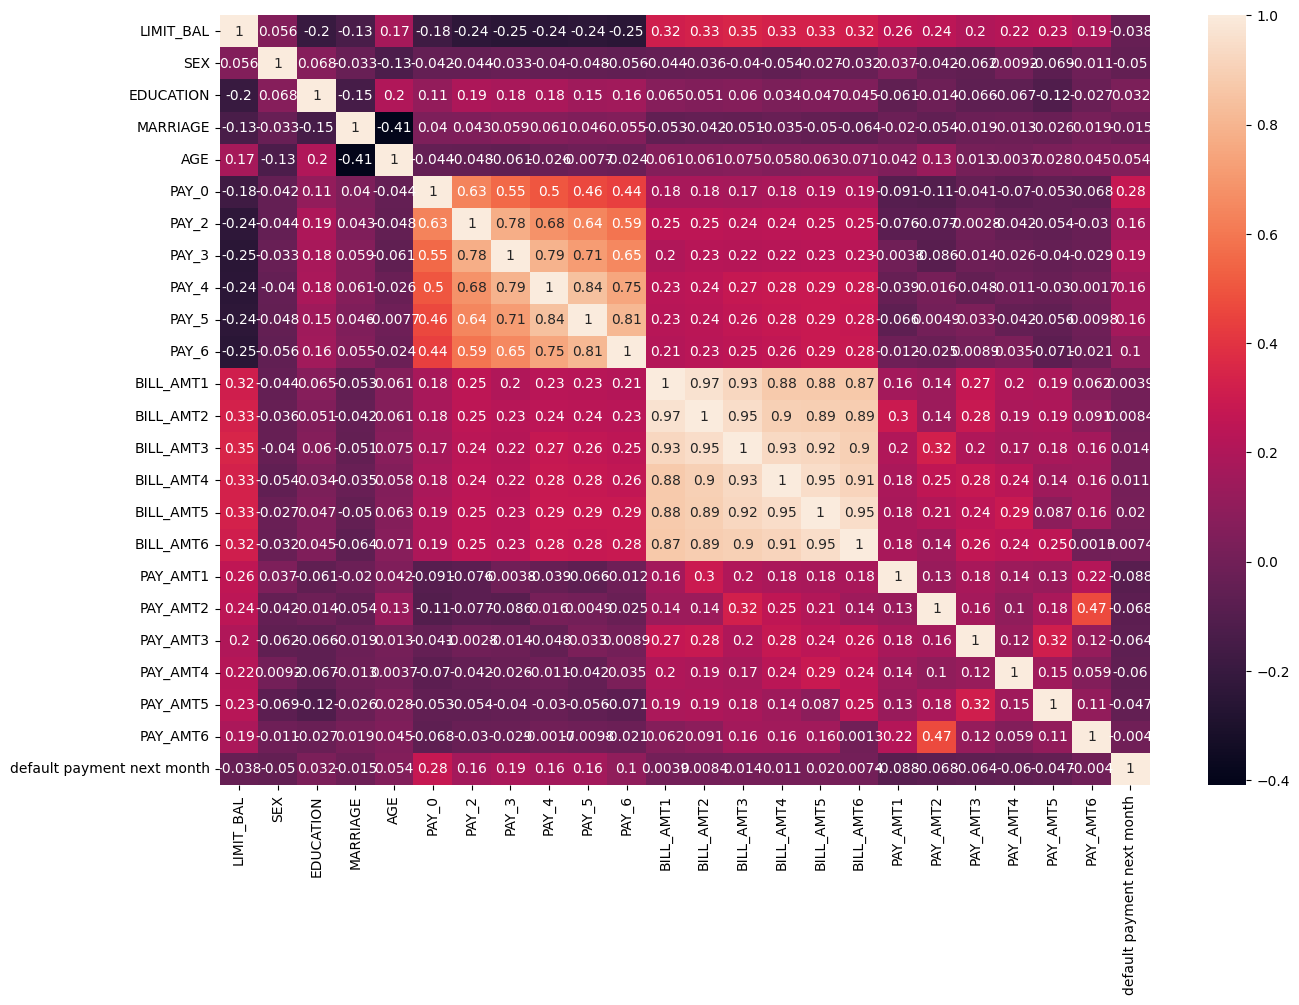

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
x=df.drop(["default payment next month"],axis=1)
y=df["default payment next month"]

In [29]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [30]:
numeric_features=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
    'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [31]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    
])

In [32]:
transformer = ColumnTransformer(
                transformers=[
                    ('trf2',StandardScaler(),numeric_features),
      ],remainder='passthrough'
                        ) 

In [33]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf2', StandardScaler(),
                                 ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                                  'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [34]:
input_train,input_test,target_train,target_test=train_test_split(x,y,test_size=0.20,random_state=128)

In [35]:
train_array = np.c_[transformer.fit_transform(input_train), target_train]
test_array = np.c_[transformer.transform(input_test), target_test]

In [36]:
models = {     
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5,algorithm="auto"),
    "GaussianNB":GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGB Classifier": XGBClassifier(),
            }

In [37]:
params={
    "Logistic Regression":{
    # "penalty":['l2', 'elasticnet'],
    },
    
    
    "Decision Tree":{
        "criterion":['gini', 'entropy', 'log_loss'],
        # "splitter":['best', 'random'],
        # "max_depth":[5,10,15]
    },
    
    "KNeighbors":{
        "n_neighbors":[1,2,3,4,5], 
        # "p":[2],
        

    },
    
    
    "GaussianNB":{
        "var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]
    },
    
    
    
    "Random Forest":{
            
            "criterion":['gini','entropy','log_loss'],
            "max_depth":[5,10,15],
            "max_features":['sqrt', 'log2', None],
    
    },
    
    
    
    "XGB Classifier":{
        "n_estimators": [50,100, 130],
        # 'learning_rate':[.1,.01,.05,.001],
        # 'n_estimators': [8,16,32,64,128,256],
        "max_depth": range(3, 11, 1),
        "random_state":[0,50,100]
    }
    
}

In [38]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [39]:
from sklearn.model_selection import GridSearchCV
def get_best_model(X_train,y_train,X_test,y_test,model_dict,params_,base_accuracy=0.7):
    models = model_dict.keys()
    for model in models:
        print(f'Initial base accuracy is {base_accuracy}')
        print(20*'*',"Estimator: ",model,20*'*')
        gs = GridSearchCV(estimator=model_dict[model],param_grid=params_[model],cv=3)
        gs.fit(X_train,y_train)
        print(f'Best parameters are :{gs.best_params_} With accuracy score:{gs.best_score_}')
        
        clasifier = model_dict[model].set_params(**gs.best_params_)
        clasifier.fit(X_train,y_train)

        y_train_pred = clasifier.predict(X_train)
        y_test_pred = clasifier.predict(X_test)
        
        train_model_score = accuracy_score(y_train, y_train_pred)

        test_model_score = accuracy_score(y_test, y_test_pred)
        
        if test_model_score >= base_accuracy:
            print('Acceptabel model found!')
            base_accuracy = test_model_score
            best_model = {model:clasifier}
        else:
            print('Model rejected\n',30*'__',"\n")
            
    
    print(f"Best model is:{list(best_model.keys())} with accuracy Score: {round(test_model_score,2)}")        
    return best_model

In [40]:
get_best_model(X_train,y_train,X_test,y_test,model_dict=models,params_=params)

Initial base accuracy is 0.7
******************** Estimator:  Logistic Regression ********************
Best parameters are :{} With accuracy score:0.8025025109590455
Acceptabel model found!
Initial base accuracy is 0.7512437810945274
******************** Estimator:  Decision Tree ********************
Best parameters are :{'criterion': 'entropy'} With accuracy score:0.7225225986314099
Model rejected
 ____________________________________________________________ 

Initial base accuracy is 0.7512437810945274
******************** Estimator:  KNeighbors ********************
Best parameters are :{'n_neighbors': 5} With accuracy score:0.8037650305539129
Acceptabel model found!
Initial base accuracy is 0.7512437810945274
******************** Estimator:  GaussianNB ********************
Best parameters are :{'var_smoothing': 0.5} With accuracy score:0.7937493546600584
Model rejected
 ____________________________________________________________ 

Initial base accuracy is 0.7512437810945274
*******

{'XGB Classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...)}

In [51]:
model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
            colsample_bylevel=1, colsample_bynode=None,
            colsample_bytree=None, device=None, early_stopping_rounds=None,
            enable_categorical=False, eval_metric=None, feature_types=None,
            gamma=None, grow_policy=None, importance_type=None,
            interaction_constraints=None, learning_rate=None, max_bin=None,
            max_cat_threshold=None, max_cat_to_onehot=None,
            max_delta_step=None, max_depth=5, max_leaves=None,
            min_child_weight=1, monotone_constraints=None,
            multi_strategy=None, n_estimators=50, n_jobs=None,
            num_parallel_tree=None,random_state=0)

In [52]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [53]:
y_pred=model.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [55]:
print(accuracy_score(y_test,y_pred))

0.7761194029850746


In [56]:
y_pred=model.predict(X_test[:1])
y_pred[0]

0